In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:
#Loading data
raw_data = pd.read_csv('Data/real_estate_price_size_year_view.csv')

In [3]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [4]:
data = raw_data.copy()

In [5]:
#Creating dummy variables
data['view'] = data['view'].map({'No sea view':0,'Sea view':1})

In [6]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [7]:
data.isnull().sum()

price    0
size     0
year     0
view     0
dtype: int64

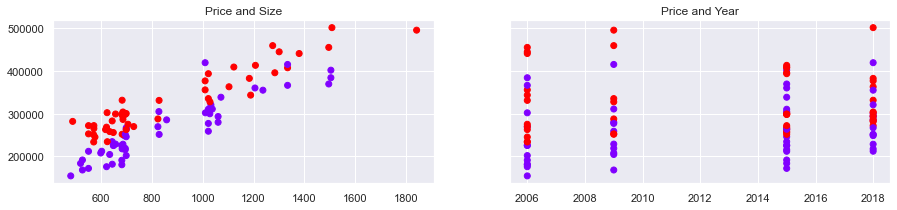

In [8]:
#prices vs size and year
f,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(15,3))
ax1.scatter(data['size'],data['price'], c=data['view'], cmap='rainbow')
ax1.set_title('Price and Size')
ax2.scatter(data['year'],data['price'],c=data['view'], cmap='rainbow')
ax2.set_title('Price and Year')
plt.show()

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

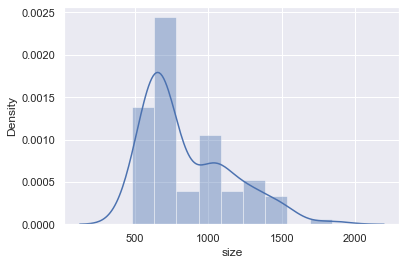

In [9]:
#Density plot for size
sns.distplot(data['size'])

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

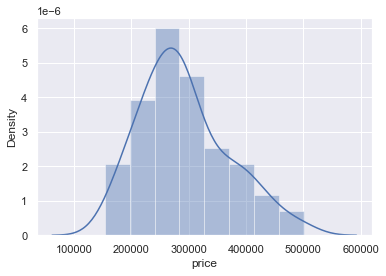

In [11]:
#density plot for price
sns.distplot(data['price'])

In [14]:
#Selecting independent and dependent variable
x1 = data[['size','year','view']]
y = data['price']

In [15]:
#Creating model
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.02e-50
Time:                        04:49:37   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x1.head()

,size,year,view
0,643.09,2015,0
1,656.22,2009,0
2,487.29,2018,1
3,1504.75,2015,0
4,1275.46,2009,1


In [17]:
table = x1.copy()
table = sm.add_constant(table)

In [18]:
pred = results.predict(table)

In [19]:
table['Predictions'] = pred

In [20]:
#Predictions
table

,const,size,year,view,Predictions
0,1.0,643.09,2015,0,224197.233189
1,1.0,656.22,2009,0,210811.945021
2,1.0,487.29,2018,1,254331.773344
3,1.0,1504.75,2015,0,416374.658398
4,1.0,1275.46,2009,1,405648.064843
...,...,...,...,...,...
95,1.0,549.80,2009,1,243802.939878
96,1.0,1037.44,2009,0,295836.058985
97,1.0,1504.75,2006,0,391904.118401
98,1.0,648.29,2015,0,225356.997610
